# Droplet Generation System. Hydraulic part

# Problem setup

## Piston Dynamics

![img](./img/drop_gen.png)
![img](./img/calc_scheme.png)

Piston moves by the hydraulic and friction forces action:
$$
    m_p\ddot{x_p} = m_pg + F_h - F_{fr},
$$
### Hydraulic force $F_h$:
$$
    F_h = p_h A_h - p_t A_t,
$$
where hydraulic container pressure, according to the Darcy-Weisbach equation and relationship of the lateral surface area of the throttle "cylinder" to the position of the spool (**action**) $A_{th}(t) = \pi D_{th} x_{th}(t)$:
$$
    p_h = p_l - \frac{\zeta_{th}\rho_h D_h^4}{32D_{th}^2}\left(\frac{\dot{x_p}}{x_{th}}\right)^2
$$
test container pressure (according to the Darcy-Weisbach equation):
$$
    p_t = p_{atm} + \frac{\zeta_{exit}\rho_t D_t^4}{2D_{exit}^4}\dot{x_p}^2
$$

Hydraulic/Test container area:
$$
    A_{h,t}=\frac{\pi D_{h,t}^2}{4}
$$

$p_l$ - pressure of the hydraulic liquid before throttling;
$p_{atm}$ - ambient environment (atmosphere) pressure;
$\zeta_{th}, \zeta_{exit}$ - hydraulic loss coefficients at throttle and at syringe exit respectively;
$\rho_h, \rho_t$ - densities of the hydraulic and test containers liquids

### Friction $F_{fr}$
Friction can be considered both by a stribeck curve or mechanical efficiency.
Let us use a mechanical efficiency approach:

![img](img/mechanical_efficiency.png)

$$
    F_{fr} = \max{(F_C, (1-\eta)F_h)},
$$

where $\eta$ - mechanical efficiency;
Coulomb friction force:
$$
    F_C = p_C\cdot\max{(A_h, A_t)}
$$
$p_C$ - pressure difference, which is necessary to overcome the dry friction

## State dynamics function

Movement starts when acting force larger than friction force.
$$
    \begin{aligned}
        &   \dot{x_p} = v_p,
        \\
        &   \dot{v_p} = \begin{cases} g + \frac{1}{m_p}[F_h(x_p, v_p, x_{th}) + F_{fr}(v_p, F_h)], \text{ if } [|v_p| > 0] \text{ or } [|F_h + m_pg| > |F_{fr}|]\\
                        0, \text{ otherwise }\end{cases}
    \end{aligned}
    \qquad x_{th} \in [0, x_{th}^{max}],
$$

where:
$$
    \begin{aligned}
        % &   F_h(v_p, x_{th}) = \begin{cases} A_h \max{\left(\left[p_l - \frac{v_p^3}{|v_p|\cdot x_{th}^2}\frac{\zeta_{th}\rho_h D_h^4}{32D_{th}^2} \right], p_{sv} \right)} - A_t \left[p_{atm} + \frac{v_p^3}{|v_p|} \frac{\zeta_{exit}\rho_t D_t^4}{2D_{exit}^4} \right], \text{ if } [x_{th} > 0] \\

        % A_h \max{\left( p_{h_{x_{th}>0}}+(\frac{x_{x_{th}>0}}{x_p}-1)\cdot E_l , p_{sv}\right)} - A_t \left[p_{atm} + \frac{v_p^3}{|v_p|} \frac{\zeta_{exit}\rho_t D_t^4}{2D_{exit}^4} \right], \text{ otherwise } \end{cases} \\
        
        & F_h(x_p, v_p, x_{th}) = A_h p_h(x_p, v_p, x_{th}) - A_t p_t(x_p, v_p) \\
        
        &\qquad \text {where: } \\

        &\qquad p_h(x_p, v_p, x_{th}) = \begin{cases}
            \max{\left(\left[p_l - \frac{v_p^3}{|v_p|\cdot x_{th}^2}\frac{\zeta_{th}\rho_h D_h^4}{32D_{th}^2} \right], p_{sv} \right)}, \text{ if } [x_{th} > 0] \\

            \max{\left(\left[p_h\vert_{x_{th}>0}+(\frac{x_p\vert_{x_{th}>0}}{x_p}-1)\frac{1}{\beta_{V_h}}\right], p_{sv}\right)}, \text{ otherwise } \\
        \end{cases} \\
        &\qquad p_t(x_p, v_p) = p_{atm} + \frac{x_p - x_{p0}}{|x_p - x_{p0}|}\min{\left(\frac{4\sigma_t}{D_{exit}}, \left|\frac{x_p - x_{p0}}{x_p}\right| \frac{1}{\beta_{V_t}} \right)} + \frac{v_p^3}{|v_p|}\frac{\zeta_{exit} \rho_t D_t^4}{2D_{exit}^4} \\
        
        & F_{fr}(v_p, F_h) = \begin{cases} 
            -\frac{v_p}{|v_p|}\max{[p_C A_{max}, (1-\eta) F_h]}, \text{ if } [|v_p|>0] \\
            
            -\frac{F_h + m_pg}{|F_h + m_pg|}p_C A_{max}, \text{ otherwise } \\
        \end{cases}
    \end{aligned}
$$

where $A_{max} = \max{(A_h, A_t)}$; $p_l > p_{atm}$; $p_{sv}$ - saturated vapor pressure of liquid ($2340~Pa$ for water), $\beta_V$ - liquid volume compression coefficient ($0.49\cdot 10^{-9}~Pa^{-1}$ for water); 
$p_h\vert_{x_{th}>0},~x_p\vert_{x_{th}>0}$ - last hydraulic pressure and piston position when $x_{th}$ was more than 0;
$\sigma_t$ - surface tension of the test liquid

The starting possition is:
$$
    \begin{aligned}
        & x_{p0} = x_p(0) = 10^{-3} [m] \\
        & v_p(0) = 0 [m/s]\\
    \end{aligned}
$$

**Note**: It is important to add, that the throttle position cannot be changed immediately. 
Thus, to model the throttle position changing let us add one more state with some constant changing speed:
$$
    \begin{aligned}
        & \text{while } x_{th} \neq x^{act}_{th}: \\
        &\qquad \dot{x_{th}} = \frac{x^{act}_{th}-x_{th}}{|x^{act}_{th}-x_{th}|}v^{max}_{th}\\
    \end{aligned}
$$

## Observations

Let us assume, that we can measure only the length of the test liquid jet $l_{jet}$.

According to the existing researches [[1](https://doi.org/10.1007/s00348-003-0629-6), [2](https://doi.org/10.1201/9781420040470)], liquid drop will be formed, if $\max(l_{jet})>l_{crit}$, where:
$$
    \begin{aligned}
        & \frac{l_{crit}}{D_{exit}} = 19.5We^{0.5}(1 + 3Oh)^{0.85} \\
        & We = \frac{\rho_t v_j^2 D_{exit}}{\sigma_t} \\
        & Oh = \frac{\sqrt{We}}{Re} \\
        & Re = \frac{\rho_t v_j D_{exit}}{\mu_t}, \\
    \end{aligned}
$$

where $v_j$ - jet velocity. 
Empirically it was estimated as $0.2 \frac{m}{s}$.
$\mu_t$ - dynamic viscosity of the test liquid.

Droplet diameter can be estimated as follows:
$$
    \frac{D_{d}}{D_{exit}} = (1.5\pi\sqrt{2 + 3Oh})^{1/3}
$$

## Running cost function

Our formal goal of control:
$$
    l_{jet} \to l_{crit}
$$

If $l_{jet} < l_{crit}$ droplet will not detach.
If $l_{jet} > l_{crit}$ droplet will detach, but with satellites.

Let us achieve this using a stochastic control policy defined by a model $\rho^{\theta}(x_{th}|l_{jet})$ with optimizing running cost $r$. $\rho^{\theta}$ will be treated as a probability distribution: $x_{th} \sim \rho^{\theta}(\bullet|l_{jet})$

Let us penalize policy by a running cost function:
$$
    r(l_{jet}) = \left(1 - \frac{l_{jet}}{l_{crit}} \right)^2
$$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from typing import Tuple, Dict, Optional, Callable, Type, Any

import matplotlib.pyplot as plt

# System implementation

In [2]:
class HydraulicSystem:
    """System class: hydraulic system. State transition function"""
    
    dim_action: int = 1
    dim_observation: int = 1
    dim_state: int = 2
    
    eps: float = 1e-12
    
    # Real throttle position limits:
    # [0, min, max]. Min - related to minimum backslash.
    # Throttle position cannot be less then minimum backslash, 
    # if throttle is opened
    x_th_limits = [0., 0.1e-6, 20e-6] # [m]
    # Policy update time
    dt_update_action = 1.0e-4 # s
    # Max throttle speed
    v_th_max = 1*(x_th_limits[2] - x_th_limits[0])/dt_update_action # m/s
    
    m_p: float = 20e-3 # kg
    p_atm: float = 1e5 # Pa
    p_l: float = 1.5e5 + p_atm # Pa
    p_h_init: float = p_atm # Pa
    g: float = 9.81
    
    # Geometry
    D_th: float = 200e-6 # Equivalent throttle diameter, m
    D_h: float = 20e-3 # m
    D_t: float = 20e-3 # m
    D_exit: float = .33e-3 # 0.33e-3 # m
    l_exit: float = 8.5e-3 # m
    get_area = lambda D: np.pi*D**2/4 # returns area in [m^2], if input in [m]
    A_h = get_area(D_h)
    A_t = get_area(D_t)
    A_max = max(A_h, A_t)
    
    # Friction params
    p_c: float = 10e3 # Pressure difference on the piston to start movement, Pa
    eta: float = 0.70 # Mechanical efficiency
    F_c = p_c * A_max # Coulomb friction force
    
    # Hydraulic coeficients
    zeta_th = 5.0 # might be find empirically (from real equipment). Now it is taken for the valve, see 'Идельчик И. Е. Справочник по гидравлическим сопротивлениям. М., "Машиностроение", 1975'
    C_D = 0.827 - 0.0085*l_exit/D_exit # see https://doi.org/10.1201/9781420040470
    zeta_exit = 1/C_D**2
    
    # Let us consider water as hydraulic and test liquid
    rho_h = 1e3 # kg/m^3
    rho_t = 1e3 # kg/m^3
    
    p_sv_h: float = 2340 # Pa
    
    beta_v_h: float = 0.49e-9 # Pa^-1
    beta_v_t: float = 0.49e-9 # Pa^-1
    
    sigma_t: float = 73e-3 # N/m
    mu_t: float = 1.0e-3 # Pa*s
    
    # capillar pressure difference to othercome for drop exiting
    p_capillar_max = 4*sigma_t/D_exit
    
    v_j = 0.2 # jet speed for the stable operation (found experimentaly) [m/s]
    We_j = rho_t*v_j**2*D_exit/sigma_t
    Re_j = rho_t*v_j*D_exit/mu_t
    Oh_j = np.sqrt(We_j)/Re_j
    # Critical jet length
    # l_crit = 19.5*np.sqrt(We_j)*(1 + 3*Oh_j)**0.85 * D_exit # see https://doi.org/10.1201/9781420040470
    l_crit = 13.4*(np.sqrt(We_j) + 3*We_j/Re_j) * D_exit # see https://doi.org/10.1007/s00348-003-0629-6
    # Estimated Droplet diameter
    D_drop = (1.5*np.pi*np.sqrt(2 + 3*Oh_j))**(1/3) * D_exit
    
    
    def __init__(self) -> None:
        """Initialize Hydraulic System"""
        self.reset()
    
    
    def reset(self) -> None:
        """Reset system to initial state."""
        
        # p_h|_{x_{th}>0}
        self.p_h_last = self.p_h_init
        # x_p|_{x_{th}>0}
        self.x_p_last = None # define later, if None
        # Initial piston position
        self.x_p_init = None # define later, if None
    
        
    def get_pressure_hydraulic(self, x_p: float, v_p: float, x_th: float) -> float:
        """ Get pressure in the hydraulic container

        Args:
            x_p (float): piston position
            v_p (float): piston velocity
            x_th (float): throttle position (action)

        Returns:
            float: pressure in the hydraulic container
        """
        
        # Define last piston position first time as init piston position
        if self.x_p_last is None:
            self.x_p_last = x_p
        
        # Calculate
        if x_th > 0:
            pressure_hydraulic = self.p_l
            # dynamic pressure loss happends only when there is a flow rate
            if v_p != 0: 
                pressure_hydraulic -= v_p**3/(abs(v_p)*x_th**2) *\
                    (self.zeta_th*self.rho_h*self.D_h**4)/(32*self.D_th**2)
        else:
            assert x_p > 0, 'piston position might be positive'
            pressure_hydraulic = self.p_h_last +\
                (self.x_p_last/x_p - 1)/self.beta_v_h
        # Pressure cannot be smaller than saturated vapor pressure
        pressure_hydraulic = max(self.p_sv_h, pressure_hydraulic)
        # if pressure_hydraulic == self.p_sv_h:
        #     print('WARNING: low hydraulic pressure')
        #     print(f'dx_p = {x_p - self.x_p_init:.3e}')
        #     print(f'v_p = {v_p:.3e}')
        
        # Save piston position and hydraulic pressure if throttle is opened
        if x_th > 0:
            self.x_p_last = x_p
            self.p_h_last = pressure_hydraulic
        return pressure_hydraulic
    
    
    def get_pressure_test(self, x_p: float, v_p: float) -> float:
        """ Get pressure in the test container

        Args:
            x_p (float): piston position
            v_p (float): piston velocity

        Returns:
            float: pressure in the test container
        """
        
        assert x_p > 0, 'piston position might be positive'
        # Define init piston position, if it is first time
        if self.x_p_init is None:
            self.x_p_init = x_p
        
        # Position difference
        dx_p = x_p - self.x_p_init
        
        pressure_capillar = min(
            self.p_capillar_max, 
            abs(dx_p/x_p)/self.beta_v_t
        )
        # print(f'pressure_capillar = {pressure_capillar}')
        # print(f'p_capillar_max = {self.p_capillar_max}')
        
        # Add tiny value self.eps, to exclude devision by 0
        pressure_test = self.p_atm +\
            dx_p/(abs(dx_p)+self.eps) * pressure_capillar
            
        # dynamic pressure loss happends only when there is a flow rate
        if v_p != 0:
            pressure_test += v_p**3/abs(v_p) *\
                (self.zeta_exit*self.rho_t*self.D_t**4)/(2*self.D_exit**4)
        
        return pressure_test
        
    
    def get_force_hydraulic(self, x_p: float, v_p: float, x_th: float) -> float:
        """ Get hydraulic force acting on the piston

        Args:
            x_p (float): piston position
            v_p (float): piston velocity
            x_th (float): throttle position (action)

        Returns:
            float: hydraulic force
        """
        
        # if x_p <= 0:
        #     _ = 2
        
        p_h = self.get_pressure_hydraulic(x_p, v_p, x_th)
        p_t = self.get_pressure_test(x_p, v_p)
        
        return self.A_h*p_h - self.A_t*p_t
        
    
    def get_force_friction(self, v_p: float, F_h: float) -> float:
        """ Get friction force acting on the piston

        Args:
            v_p (float): piston velocity
            F_h (float): Hydraulic force

        Returns:
            float: friction force
        """
        
        if v_p > 0:
            return - v_p/abs(v_p) * max(self.F_c, (1-self.eta)*F_h)
        # If piston does not move
        return -self.F_c * (self.m_p*self.g + F_h)/abs(self.m_p*self.g + F_h)
    
    
    def get_acceleration(self, x_p: float, v_p: float, x_th: float) -> float:
        """ Get piston acceleration

        Args:
            x_p (float): piston position
            v_p (float): piston velocity
            x_th (float): throttle position (action)

        Returns:
            float: piston acceleration
        """
        F_h = self.get_force_hydraulic(x_p, v_p, x_th)
        F_fr = self.get_force_friction(v_p, F_h)
        
        # print(f'F_h = {F_h}')
        # print(f'F_fr = {F_fr}')
        
        if (abs(v_p) > 0) or (abs(F_h + self.m_p*self.g) > abs(F_fr)):
            return self.g + 1/self.m_p * (F_h + F_fr)
        return 0 # if piston does not move and acting force lower than friction
    
    
    def compute_dynamics(self, state: np.array, action: np.array) -> np.array:
        """Calculate right-hand-side (rhs) for ODE solver (or Euler integrator)

        Args:
            state (np.array): current state
            action (np.array): current action

        Returns:
            np.array: rhs for the ODE solver
        """
        
        x_p = state[0]
        v_p = state[1]
        
        # real throttle position
        # If real throttle position out of bounds - end throttle movement and set in bounds
        x_th = max(self.x_th_limits[0], state[2])
        x_th = min(self.x_th_limits[2], x_th)
        # Throttle position cannot be less then minimum backslash, if throttle is opened
        if x_th > 0:
            x_th = max(self.x_th_limits[1], x_th)
        
        x_th_act = max(self.x_th_limits[0], action[0]) # consider negative action as closed throttle
        # Throttle position cannot be less then minimum backslash, if throttle is opened
        if x_th_act > 0:
            x_th_act = max(self.x_th_limits[1], x_th_act)
        
        assert (x_th >= self.x_th_limits[0]) and (x_th <= self.x_th_limits[2]), 'action out of the bounds'
        
        Dstate = np.zeros(self.dim_state + 1) # just to include an emplicit state (current throttle position)
        # \dot{x_p}
        Dstate[0] = v_p
        # \dot{v_p}
        Dstate[1] = self.get_acceleration(x_p, v_p, x_th)
        
        # Apply v_th
        # if real throttle position is differ from the set one, change it
        if abs(x_th_act - x_th) > self.eps:
            if x_th_act > 0:
                Dstate[2] = (x_th_act - x_th)/abs(x_th_act - x_th) * self.v_th_max
            else:
                Dstate[2] = -self.v_th_max if x_th > 0 else 0
        else:
            Dstate[2] = 0
        
        return Dstate
    
    
    def get_jet_velocity(self, v_p: float) -> float:
        """Get exit jet velocity

        Args:
            v_p (float): piston velocity

        Returns:
            float: exit jet velocity
        """
        return v_p * self.D_t**2/self.D_exit**2
    
    
    def get_jet_length(self, x_p: float) -> float:
        """Get objective (jet length (which necessary to compare with l_crit))

        Args:
            x_p (float): piston position

        Returns:
            float: objective 
        """
        return (x_p - self.x_p_init) * self.D_t**2/self.D_exit**2
    
    
    def get_observation(self, state: np.array) -> np.array:
        """Get observation (relative jet length)

        Args:
            state (np.array): system state

        Returns:
            np.array: observation
        """
        x_p = state[0]
        
        # Define init piston position, if it is first time
        if self.x_p_init is None:
            self.x_p_init = x_p
        
        observation = np.zeros(self.dim_observation)
        observation[0] = self.get_jet_length(x_p) / self.l_crit
        
        return observation

# Simulator

Let us implement it with ODE-solver

In [3]:
class Simulator:
    """Integrator"""
    
    def __init__(
        self,
        system: HydraulicSystem,
        N_steps: int,
        state_init: np.array,
        step_size: float = 1e-4, # s
        time_scale_first = 1e-9, # for the first step
        time_scale_max = 1e-4 # 5e-4, # for the max step in solve_ivp
    ):
        self.system = system
        self.N_steps = N_steps
        self.step_size = step_size
        self.time_scale_first = time_scale_first
        self.time_scale_max = time_scale_max
        self.state_init = np.zeros(system.dim_state+1) # add one state for the x_th (real)
        self.state_init[:-1] = state_init.copy()
        
        self.reset()
        
    
    def reset(self) -> None:
        """Resets the system to initial state"""
        self.current_step_idx = 0
        self.state = self.state_init.copy()
        self.action = np.zeros(self.system.dim_action)
        self.system.reset()
    
    
    def set_action(self, action: np.array) -> None:
        """ Save current action to 'self.action'

        Args:
            action (np.array): current action
        """
        self.action = action.copy()
    
    
    def system_transition_function(self, state: np.array, action: np.array) -> np.array:
        """ Ger next state by the action

        Args:
            state (np.array): system state
            action (np.array): system action

        Returns:
            np.array: next state
        """
        def rhs(t: float, y: np.array) -> np.array:
            """ Get rhs (Dstates) for the ode-solver

            Args:
                t (float): time
                y (np.array): state (in scipy notation)

            Returns:
                np.array: rhs (Dstates) for the ode-solver
            """
            return self.system.compute_dynamics(y, action)
        
        first_step = self.time_scale_first * self.step_size
        max_step = self.time_scale_max * self.step_size
        
        next_state = solve_ivp(
            fun=rhs, 
            t_span=(0, self.step_size), 
            y0=state,
            first_step=first_step,
            max_step=max_step,
        
        ).y.T[-1]
        
        return next_state
    
    
    def step(self) -> bool:
        """ Do one integration step with step_size

        Returns:
            bool: status of simulation. 'True' - simulation continues, 'False' - simulation stopped
        """
        
        if self.current_step_idx <= self.N_steps:
            self.state = self.system_transition_function(self.state, self.action)
            self.current_step_idx += 1
            return True
        return False
    
    
    def get_sim_step_data(self) -> Tuple[int, np.array, np.array]:
        """ Get current step id, observation and action

        Returns:
            Tuple[int, np.array, np.array]: _description_
        """
        
        return (
            int(self.current_step_idx),
            self.system.get_observation(self.state),
            np.copy(self.action)
        )

## Test simulator

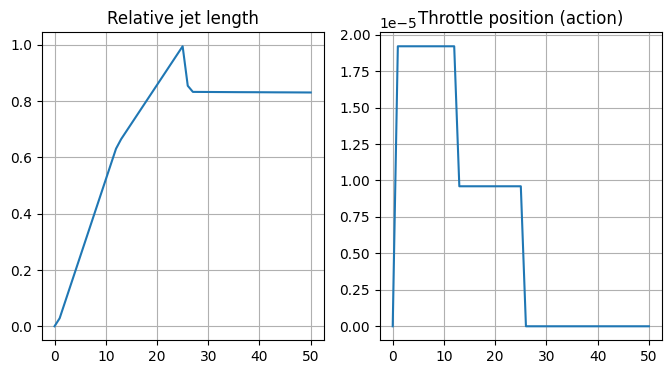

In [4]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=50, state_init=np.array([2e-3, 0]))

observations = []
actions = []

while simulator.step():
    (
        step_idx,
        observation,
        action,
    ) = simulator.get_sim_step_data()
    
    if simulator.current_step_idx < 13:
        new_action = np.array([19.2e-6])
    elif simulator.current_step_idx < 26:
        new_action = np.array([9.6e-6])
    else:
        new_action = np.array([0])
    # new_action = np.array([20e-6 * (1 - observation[0])])
    
    simulator.set_action(new_action)
    observations.append(observation)
    actions.append(action)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax1.plot(np.array(observations)[:,0])
ax1.grid()
ax1.set_title('Relative jet length')
ax2.plot(np.array(actions)[:, 0])
ax2.grid()
ax2.set_title('Throttle position (action)');

# APPLICATION

OLD State dynamics function

State dynamics function is:
$$
    \begin{aligned}
        &   \dot{x_p} = \begin{cases} v_p, \text{ if } [x_{th} > 0] \text{ and } [F_h(v_p, x_{th}) > |F_{fr}(v_p, x_{th})|] \\
                        0, \text{ otherwise }\end{cases}
        \\
        &   \dot{v_p} = \begin{cases} \frac{1}{m_p}[F_h(v_p, x_{th}) + F_{fr}(v_p, x_{th})], \text{ if } [x_{th} > 0] \text{ and } [F_h(v_p, x_{th}) > |F_{fr}(v_p, x_{th})|] \\
                        0, \text{ otherwise }\end{cases}
    \end{aligned}
    \qquad x_{th} \in [0, x_{th}^{max}],
$$

where (if $x_{th}>0$):
$$
    \begin{aligned}
        &   F_h(v_p, x_{th}) = \left[p_l - \frac{\zeta_{th}\rho_h D_h^4}{32D_{th}^2}\left(\frac{v_p}{x_{th}}\right)^2 \right]A_h - \left[p_{atm} + \frac{\zeta_{exit}\rho_t D_t^4}{2D_{exit}^4}v_p^2 \right]A_t, \\
        &   F_{fr}(v_p, x_{th}) = -\frac{v_p}{|v_p|}\max{[p_C\cdot A_{max}, (1-\eta)\cdot F_h(v_p, x_{th})]}. \\
    \end{aligned}
$$

where $A_{max} = \max{(A_h, A_t)}$